In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')
#!ls "/content/drive/My Drive/Covers"

Mounted at /content/drive


In [ ]:
!python3 --version

Python 3.6.9


In [ ]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
from datetime import datetime as dt
from datetime import timedelta as td
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_colwidth', 200) 
path='drive/My Drive/Covers/'
path_res='drive/My Drive/Results/'
www='https://experts.covers.com'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.9; rv:45.0) Gecko/20100101 Firefox/45.0'}
r = requests.get('https://experts.covers.com/handicappers', headers=headers)
soup = BeautifulSoup(r.text, 'html.parser')

cappers1={'Soccer Authority': 'https://experts.covers.com/Handicapper/Soccer_Authority',
 'Jockey Club': 'https://experts.covers.com/handicapper/jockey_club',
 'Best Fight Picks':'https://experts.covers.com/handicapper/best_fight_picks',
 'Auto Racing Advisor': 'https://experts.covers.com/Handicapper/Auto_Racing_Advisor',
 'Tennis Insiders': 'https://experts.covers.com/Handicapper/Tennis_Insiders',
 'Golf Forecaster': 'https://experts.covers.com/Handicapper/Golf_Forecaster',
 'Lee Sterling':'https://experts.covers.com/handicapper/lee_sterling',
 'Anthony Stalter':'https://experts.covers.com/handicapper/anthony_stalter',
 'Brad Feinberg':'https://experts.covers.com/handicapper/brad_feinberg',
 'Alex B Smith':'https://experts.covers.com/handicapper/alex_b_smith',
 'Paul Bovi':'https://experts.covers.com/handicapper/paul_bovi'
 }

cappers={'AAA Sports': 'https://experts.covers.com/Handicapper/aaa_sports',
 'Al McMordie': 'https://experts.covers.com/Handicapper/Al_McMordie',
 'American Sports Analysts': 'https://experts.covers.com/Handicapper/American_Sports_Analysts',
 'Auto Racing Advisor': 'https://experts.covers.com/Handicapper/Auto_Racing_Advisor',
 'Ben Burns': 'https://experts.covers.com/Handicapper/Ben_Burns',
 'Dan Kaiser': 'https://experts.covers.com/Handicapper/Dan_Kaiser',
 'Forum Legends': 'https://experts.covers.com/Handicapper/Forum_Legends',
 'Golf Forecaster': 'https://experts.covers.com/Handicapper/Golf_Forecaster',
 'Jesse Schule': 'https://experts.covers.com/Handicapper/Jesse_Schule',
 'Jockey Club': 'https://experts.covers.com/handicapper/jockey_club',
 'Larry Ness': 'https://experts.covers.com/Handicapper/Larry_Ness',
 'Lee Sterling':'https://experts.covers.com/handicapper/lee_sterling',
 'Marc Lawrence': 'https://experts.covers.com/Handicapper/Marc_Lawrence',
 'Matt Fargo': 'https://experts.covers.com/Handicapper/Matt_Fargo',
 'Mike Lundin': 'https://experts.covers.com/Handicapper/Mike_Lundin',
 'Power Sports': 'https://experts.covers.com/Handicapper/Power_Sports',
 'Ricky Tran': 'https://experts.covers.com/Handicapper/Ricky_Tran',
 'Scott Rickenbach': 'https://experts.covers.com/Handicapper/Scott_Rickenbach',
 'Soccer Authority': 'https://experts.covers.com/Handicapper/Soccer_Authority',
 'Sportspicker AI': 'https://experts.covers.com/Handicapper/Sportspicker_AI',
 'Spread Knowledge': 'https://experts.covers.com/Handicapper/Spread_Knowledge',
 'Tennis Insiders': 'https://experts.covers.com/Handicapper/Tennis_Insiders',
 'Teddy Covers': 'https://experts.covers.com/Handicapper/Teddy_Covers',
 'Tim Michael': 'https://experts.covers.com/Handicapper/Tim_Michael',
 'Will Rogers': 'https://experts.covers.com/Handicapper/Will_Rogers',
 'Anthony Stalter':'https://experts.covers.com/handicapper/anthony_stalter',
 'Brad Feinberg':'https://experts.covers.com/handicapper/brad_feinberg',
 'Alex B Smith':'https://experts.covers.com/handicapper/alex_b_smith',
 'Paul Bovi':'https://experts.covers.com/handicapper/paul_bovi',
 'Jazz Ray':'https://experts.covers.com/handicapper/jazz_ray'
 }

cols=['WTA','NCAAF','NBA','MLB','NHL','ATP','NFL','NCAAB','WNBA','Bundesliga','Champions League','Premier League','Serie A','MLS','Coupe de la Liga','Ligue 1','CFL','E-Sports','Horse Racing','Copa America','Nascar','AAF','Indycar','PGA',
       'Formula One','Africa Cup of Nations','International Friendly','UFC']

In [ ]:
#Обновление
def FillDF(r):
  if '-' in str(r['UNITS']):
    r['W/L']='L'
  r['UNITS']=int(str(r['UNITS']).replace('$','').replace(',',''))
  if r['PICK'].split(' ')[0] not in ['Over','Under']:
    pick1=r['PICK'].split(' vs. ')[0]
    if pick1!=r['PICK']:
      pick2=r['PICK'].split(' vs. ')[1]
      if pick2 in pick1:
        r['PICK']=pick2
      else:
        pick1=pick1.split(' ')
        if len(pick1)>2:
          r['PICK']=' '.join(pick1[:int(len(pick1)/2)])
        else:
          r['PICK']=pick1[0]

  return r


dd=dt.now()
dd-=td(days=1)
dat=dd.strftime('%y.%m.%d')
dat_bet=dd.strftime('%b %d')
if dat_bet[-2]=='0':
  dat_bet=dat_bet.replace('0','')
#dat='20.09.01'
print(dat)
for capper,link in list(cappers.items()):
  link=link.lower()
  i=0
  cap=pd.read_html(link)[0]
  while len(cap)!=10:
    i+=1
    cap=pd.read_html(link)[i]

  try:
    if cap.loc[0,'Date']==dat_bet:
      cap=cap[cap['Date']==dat_bet]
      cap.columns=['Capper','Date','League','UNITS','PICK']
      cap['Capper']=[capper]*len(cap)
      cap['Date']=[dat]*len(cap)
      cap.insert(2,'W/L','W')
      cap=cap.apply(FillDF,axis=1)
      cap=cap[['Capper','Date','W/L','League','PICK','UNITS']]
      cap['PICK']=list(map(lambda x: x.replace('\xe9',''),cap['PICK']))
      cap['PICK']=list(map(lambda x: x.replace('\xe1',''),cap['PICK']))
      cap.to_csv(path+capper+'.csv',mode='a',encoding="cp1251",index=False,header=False)
      print(capper)
      time.sleep(11)
  except KeyError:
    print()
    print('!!ERROR!!',capper)
    print()
print('ГОТОВО')

20.11.22
AAA Sports
Al McMordie
American Sports Analysts
Ben Burns
Dan Kaiser
Forum Legends
Jesse Schule
Larry Ness
Lee Sterling
Marc Lawrence
Matt Fargo
Mike Lundin
Power Sports
Ricky Tran
Scott Rickenbach
Soccer Authority
Sportspicker AI
Spread Knowledge
Tennis Insiders
Teddy Covers
Tim Michael
Will Rogers
Anthony Stalter
Brad Feinberg
Alex B Smith
Paul Bovi
Jazz Ray
ГОТОВО


In [ ]:
cap['PICK']=list(map(lambda x: x.replace('\xe9',''),cap['PICK']))
cap.to_csv(path+capper+'.csv',mode='a',encoding="cp1251",index=False,header=False)

In [ ]:
#УДАЛЯЕМ ДУБЛИКАТЫ
list_cappers=os.listdir(path)
for pf in list_cappers:
  if 'csv' in pf:
    try:
      pp=pd.read_csv(path+pf)
      pp=pp.drop_duplicates()
      pp.to_csv(path+pf,index=False)
    except:
      print(f'!! {pf} !!')


In [ ]:
#обновление всех капперов из csv-файлов
all_cappers=pd.DataFrame(columns=['Capper','DATE','W/L','League','PICK','UNITS'])
for capper in cappers.keys():
  filename=capper+'.csv'
  try:
    cap=pd.read_csv(path+filename)
    all_cappers=all_cappers.append(cap)
  except:
    pass
all_cappers.to_csv(path+'all_cappers.csv',encoding="cp1251",index=False)
#all_cappers

In [ ]:
#Заработок на дату ...

caps_day={}
for capper in cappers.keys():
  filename=capper+'.csv'
  cap=pd.read_csv(path+filename)
  ligi=cap.groupby(by='League')['UNITS'].sum().index
  caps_day[capper]=cap.query("DATE=='{}'".format(dat))['UNITS'].sum()
list_caps=list(caps_day.items())
list_caps.sort(key=lambda x: x[1],reverse=True)
for el in list_caps:
    print('Day wager {}: '.format(el[0]),el[1])


#for el in ligi:
#  print(el,AAA_S[AAA_S['League']=='{}'.format(el)]['UNITS'].sum())
#display(AAA_S[AAA_S['League']=='{}'.format(el)],AAA_S[AAA_S['League']=='{}'.format(el)]['UNITS'].sum())

Day wager Mike Lundin:  2200
Day wager Brad Feinberg:  1355
Day wager Soccer Authority:  1000
Day wager Tennis Insiders:  800
Day wager Al McMordie:  793
Day wager Paul Bovi:  147
Day wager American Sports Analysts:  19
Day wager Auto Racing Advisor:  0
Day wager Golf Forecaster:  0
Day wager Jockey Club:  0
Day wager Jazz Ray:  -375
Day wager Jesse Schule:  -415
Day wager Power Sports:  -450
Day wager Alex B Smith:  -830
Day wager Scott Rickenbach:  -1062
Day wager Teddy Covers:  -1080
Day wager Matt Fargo:  -1090
Day wager Marc Lawrence:  -1170
Day wager Will Rogers:  -1216
Day wager Lee Sterling:  -1229
Day wager Dan Kaiser:  -1272
Day wager Ben Burns:  -1410
Day wager Spread Knowledge:  -1526
Day wager Anthony Stalter:  -1800
Day wager Forum Legends:  -1874
Day wager Ricky Tran:  -2044
Day wager Sportspicker AI:  -2933
Day wager Larry Ness:  -3144
Day wager Tim Michael:  -3348
Day wager AAA Sports:  -4529


In [ ]:
#ПОИСК РЕЗУЛЬТАТОВ ПОСЛЕ ПРОИГРЫША
def correct(row):
  row['DATE']=row['DATE'].replace('.','-')
  if 'Under' in row['PICK'] or 'Over' in row['PICK']:
    row['PICK']=float('nan')
  return row

liga='MLB'
filename='AAA Sports.csv'
cap=pd.read_csv(path+filename)
cap.columns=['Capper','DATE','WL','League','PICK','UNITS']
cap=cap.apply(correct,axis=1)
cap=cap.query(f"DATE>'19-11-23' & WL=='L' & League=='{liga}'").reset_index(drop=True)
start_date=cap.loc[0,'DATE']+'.csv'
list_res=os.listdir(path_res)
list_res.sort()
pos=list_res.index(start_date)
list_res=list_res[pos+1:]
#display(list_res)
all_res=pd.DataFrame(columns=['Date','League','Matchup','Teams','Total','Winner'])
for f in list_res:
  tmp=pd.read_csv(path_res+f,header=0)
  all_res=all_res.append(tmp,sort=False)
all_res=all_res.query(f"League=='{liga}'")
cap.dropna(inplace=True)
cap.reset_index(drop=True,inplace=True)
display(cap.head(),all_res.head())

,Capper,DATE,WL,League,PICK,UNITS
0,AAA Sports,20-07-26,L,MLB,Texas,-1120
1,AAA Sports,20-07-26,L,MLB,St. Louis,-1288
2,AAA Sports,20-07-26,L,MLB,Houston,-1256
3,AAA Sports,20-07-27,L,MLB,Detroit,-1300
4,AAA Sports,20-07-28,L,MLB,Milwaukee,-1500


,Date,League,Matchup,Teams,Total,Winner
0,20-07-27,MLB,LA Angels at Oakland,LAA at. OAK,U,OAK
1,20-07-27,MLB,Arizona at San Diego,ARI at. SD,U,SD
2,20-07-27,MLB,Toronto at Washington,TOR at. WAS,U,TOR
3,20-07-27,MLB,Chi. Cubs at Cincinnati,CHC at. CIN,O,CHC
4,20-07-27,MLB,Atlanta at Tampa Bay,ATL at. TB,O,TB


In [ ]:
results=pd.DataFrame()
for i in range(len(cap)):
  date=cap.loc[i,'DATE']
  team=cap.loc[i,'PICK']
  tmp1=all_res.query(f"Date>'{date}'")  #все результаты после искомой даты
  matchup_list=tmp1['Matchup'].to_list()
  matchups=list(filter(lambda x: team in x, matchup_list))  #список следующих матчей команды
  m_len=len(matchups)
  if m_len==0:
    break
  if m_len>2:
    matchups=matchups[:2]
  m_len=len(matchups)
  tmp2=tmp1.query(f"Matchup in {matchups}").reset_index(drop=True)
  wl=0
  for c in range(m_len):
    if team+' at' in tmp2.loc[c,'Matchup']:
      final_team=tmp2.loc[c,'Teams'].split(' at. ')[0]
    else:
      final_team=tmp2.loc[c,'Teams'].split(' at. ')[1]
    if final_team==tmp2.loc[c,'Winner']:
      wl=c+1
      break
  tmp=pd.DataFrame(pd.Series([date,team,wl])).T
  results=results.append(tmp,sort=False)
results.columns=['Date','Team','Result']
res=results['Result'].value_counts()
b1=100
b2=500
final_res=res[1]*0.85*b1-(res[0]+res[2])*b1+res[2]*0.85*b2-res[0]*b2
display(int(final_res))

110

In [ ]:
cappers.keys()

dict_keys(['AAA Sports', 'Al McMordie', 'American Sports Analysts', 'Auto Racing Advisor', 'Ben Burns', 'Chris Elliott', 'Dan Kaiser', 'Dave Cokin', 'Forum Legends', 'Golf Forecaster', 'Jesse Schule', 'Larry Ness', 'Marc Lawrence', 'Matt Fargo', 'Mike Lundin', 'Power Sports', 'Ricky Tran', 'Scott Rickenbach', 'Silicon Valley Simulator', 'Soccer Authority', 'Sportspicker AI', 'Spread Knowledge', 'Steve Merril', 'Tennis Insiders', 'Teddy Covers', 'Tim Michael', 'Will Rogers'])

In [ ]:
#ПОИСК РЕЗУЛЬТАТОВ ПОСЛЕ ПРОИГРЫША
def correct(row):
  row['DATE']=row['DATE'].replace('.','-')
  if 'Under' in row['PICK'] or 'Over' in row['PICK']:
    row['PICK']=float('nan')
  return row

games=2 #количество матчей после проигрыша
summa=0
liga='MLB'
usa_caps=['AAA Sports','Al McMordie','American Sports Analysts','Ben Burns','Chris Elliott','Dan Kaiser','Forum Legends','Jesse Schule','Larry Ness','Marc Lawrence','Matt Fargo',
          'Mike Lundin','Power Sports','Ricky Tran','Scott Rickenbach','Sportspicker AI','Spread Knowledge','Steve Merril','Teddy Covers','Tim Michael','Will Rogers']
for capps in usa_caps:
  try:
    filename=capps+'.csv'
    cap=pd.read_csv(path+filename)
    cap.columns=['Capper','DATE','WL','League','PICK','UNITS']
    cap=cap.apply(correct,axis=1)
    cap=cap.query(f"DATE>'19-11-23' & WL=='L' & League=='{liga}'").reset_index(drop=True)
    start_date=cap.loc[0,'DATE']+'.csv'
    list_res=os.listdir(path_res)
    list_res.sort()
    pos=list_res.index(start_date)
    list_res=list_res[pos+1:]
    all_res=pd.DataFrame(columns=['Date','League','Matchup','Teams','Total','Winner'])
    for f in list_res:
      tmp=pd.read_csv(path_res+f,header=0)
      all_res=all_res.append(tmp,sort=False)
    all_res=all_res.query(f"League=='{liga}'")
    cap.dropna(inplace=True)
    cap.reset_index(drop=True,inplace=True)
    #display(cap.head(),all_res.head())
    results=pd.DataFrame()
    for i in range(len(cap)):
      date=cap.loc[i,'DATE']
      team=cap.loc[i,'PICK']
      tmp1=all_res.query(f"Date>'{date}'")  #все результаты после искомой даты
      matchup_list=tmp1['Matchup'].to_list()
      matchups=list(filter(lambda x: team in x, matchup_list))  #список следующих матчей команды
      m_len=len(matchups)
      if m_len==0:
        break
      if m_len>games:
        matchups=matchups[:games]
      m_len=len(matchups)
      tmp2=tmp1.query(f"Matchup in {matchups}").reset_index(drop=True)
      wl=0
      for c in range(m_len):
        if team+' at' in tmp2.loc[c,'Matchup']:
          final_team=tmp2.loc[c,'Teams'].split(' at. ')[0]
        else:
          final_team=tmp2.loc[c,'Teams'].split(' at. ')[1]
        if final_team==tmp2.loc[c,'Winner']:
          wl=c+1
          break
      tmp3=pd.DataFrame(pd.Series([date,team,wl])).T
      results=results.append(tmp3,sort=False)
    results.columns=['Date','Team','Result']
    res=results['Result'].value_counts()
    if games==2:
      b1=100
      b2=100
      final_res=res[1]*0.85*b1-(res[0]+res[2])*b1+res[2]*0.85*b2-res[0]*b2
      summa+=final_res
    else:
      b1=100
      b2=300
      b3=500
      final_res=res[1]*0.85*b1-(res[0]+res[2]+res[3])*b1+res[2]*0.85*b2-(res[0]+res[3])*b2+res[3]*0.85*b3-res[0]*b3
      summa+=final_res
    display(f"{capps}: {int(final_res)}")
  except:
    pass
print('Общая сумма:',summa)

'AAA Sports: 464'

'Al McMordie: -1850'

'Ben Burns: -205'

'Forum Legends: -10'

'Jesse Schule: 125'

'Larry Ness: 75'

'Marc Lawrence: -420'

'Matt Fargo: -940'

'Mike Lundin: -1155'

'Power Sports: -130'

'Sportspicker AI: -605'

'Spread Knowledge: 150'

'Teddy Covers: -305'

'Tim Michael: 870'

'Will Rogers: -450'

Общая сумма: -4385.0


In [ ]:
cap=pd.read_csv(path+'Lee Sterling.csv')
display(cap[cap['League']=='NFL'])

,Capper,DATE,W/L,League,PICK,UNITS
89,Lee Sterling,20.09.13,W,NFL,Arizona,700
90,Lee Sterling,20.09.13,W,NFL,Green Bay,800
91,Lee Sterling,20.09.13,L,NFL,Miami,-749
92,Lee Sterling,20.09.13,L,NFL,Carolina,-952
93,Lee Sterling,20.09.13,L,NFL,Detroit,-864
96,Lee Sterling,20.09.17,W,NFL,Over Cincinnati vs. Cleveland,800
100,Lee Sterling,20.09.20,W,NFL,L.A. Chargers,900
101,Lee Sterling,20.09.20,W,NFL,San Francisco,800
102,Lee Sterling,20.09.20,W,NFL,L.A. Rams,800
103,Lee Sterling,20.09.20,W,NFL,Indianapolis,800


In [ ]:
print('dat {}:'.format(dat),all_cappers.query("DATE=='{}'".format(dat))['UNITS'].sum())

dat 20.07.11: 1496


In [ ]:
wager=pd.DataFrame(columns=['Capper','Wager'])
wag={}
all=pd.DataFrame(columns=cols,index=cappers.keys()).fillna(0)
sum=0
for capper in cappers.keys():
  filename=capper+'.csv'
  cap=pd.read_csv(path+filename)
  curr_cap=cap.groupby(by=['League'])['UNITS'].sum()
  sum1=0
  for el in range(len(curr_cap)):
    all.loc[capper,curr_cap.index[el]]=curr_cap.iloc[el]
    if np.issubdtype(curr_cap.iloc[el], np.int64):
      sum+=curr_cap.iloc[el]
      sum1+=curr_cap.iloc[el]
  wag[capper]=sum1
all=all.fillna(0)
tennis=all.loc['Tennis Insiders',:].sum()
all.loc['Tennis Insiders','TENNIS']=tennis
all['TENNIS']=list(map(int,all['TENNIS']))
soccer=all.loc['Soccer Authority',:].sum()
all.insert(11,'Soccer',0)
all.loc['Soccer Authority','Soccer']=soccer
all['Soccer']=list(map(int,all['Soccer']))
iwag=wag.items()
display((sorted(iwag,key=lambda x: x[1],reverse=True)))
all=all[['NCAAF','NBA','MLB','NHL','NFL','NCAAB','WNBA','TENNIS','Soccer']]
display(all)

[('AAA Sports', 47171),
 ('Scott Rickenbach', 42730),
 ('Tennis Insiders', 22242),
 ('Jesse Schule', 17416),
 ('Lee Sterling', 14727),
 ('Ricky Tran', 10358),
 ('Brad Feinberg', 7692),
 ('American Sports Analysts', 5799),
 ('Matt Fargo', 3510),
 ('Al McMordie', 2786),
 ('Tim Michael', 2506),
 ('Sportspicker AI', 2460),
 ('Anthony Stalter', -55),
 ('Jockey Club', -1040),
 ('Soccer Authority', -2827),
 ('Alex B Smith', -5379),
 ('Auto Racing Advisor', -8436),
 ('Paul Bovi', -9222),
 ('Golf Forecaster', -10105),
 ('Larry Ness', -16967),
 ('Teddy Covers', -18081),
 ('Dan Kaiser', -18512),
 ('Jazz Ray', -21198),
 ('Marc Lawrence', -32976),
 ('Ben Burns', -33825),
 ('Forum Legends', -35383),
 ('Spread Knowledge', -46879),
 ('Will Rogers', -60300),
 ('Power Sports', -73206),
 ('Mike Lundin', -94426)]

,NCAAF,NBA,MLB,NHL,NFL,NCAAB,WNBA,TENNIS,Soccer
AAA Sports,-6326,32028,-2286,-11288,21751,12566,-2220,0,0
Al McMordie,-2332,6259,-7021,-190,15140,-8370,0,0,0
American Sports Analysts,-17135,2574,-4402,14490,2046,8576,0,0,0
Auto Racing Advisor,0,0,0,0,0,0,0,0,0
Ben Burns,-22246,-5715,28981,-38868,-9952,9519,0,0,0
Dan Kaiser,4105,-5727,2244,-8008,4225,-15351,0,0,0
Forum Legends,5182,-6652,-23371,1941,-7768,-4715,0,0,0
Golf Forecaster,0,0,0,0,0,0,0,0,0
Jesse Schule,2332,18402,11396,4219,-11708,-2833,0,0,0
Jockey Club,0,0,0,0,0,0,0,0,0


In [ ]:
#полная сводка по всем капперам
all_sports={}
for el in all.columns:
  all_sports[el]=all[el].sum()

df=pd.DataFrame({'Wager':list(all_sports.values())},index=list(all_sports.keys()))
df1=pd.DataFrame({'Wager':list(wag.values())},index=list(wag.keys()))
display(df.sort_values(by='Wager',ascending=False).T)
display(df1.sort_values(by='Wager',ascending=False).T)

,TENNIS,WNBA,NFL,NCAAB,NBA,MLB,NHL,NCAAF
Wager,18111,-7990,-28739,-39968,-41053,-48712,-55681,-101904


,AAA Sports,Scott Rickenbach,Jesse Schule,Tennis Insiders,Tim Michael,Ricky Tran,Alex B Smith,Brad Feinberg,American Sports Analysts,Lee Sterling,Anthony Stalter,Matt Fargo,Sportspicker AI,Al McMordie,Soccer Authority,Dan Kaiser,Jockey Club,Auto Racing Advisor,Jazz Ray,Golf Forecaster,Paul Bovi,Teddy Covers,Larry Ness,Forum Legends,Spread Knowledge,Marc Lawrence,Ben Burns,Mike Lundin,Will Rogers,Power Sports
Wager,45593,37599,21157,18111,16755,7426,4907,4485,4456,2657,2045,1963,604,-1772,-3053,-3811,-4135,-4436,-5278,-8671,-9513,-17061,-18610,-30187,-34213,-40620,-45740,-75680,-76418,-76920


In [ ]:
sp=['NHL','NBA','NFL','NCAAB','NCAAF','MLB']
all_caps=pd.DataFrame(columns=list(cappers.keys()))
for el in sp:
  s1=(pd.DataFrame(all[el])).T
  all_caps=all_caps.append(s1)
  minmax=all_caps.loc[el].sort_values()
  print("\033[102m",el,"\033[0m")
  display(minmax[:3],minmax[-3:][::-1])
  print()
display(all_caps.drop(['Auto Racing Advisor','Golf Forecaster','Jockey Club','Soccer Authority','Tennis Insiders'],axis=1))

 NHL 


Ben Burns       -38868
Power Sports    -31820
Will Rogers     -26555
Name: NHL, dtype: object

Scott Rickenbach            26381
American Sports Analysts    14490
Ricky Tran                  13848
Name: NHL, dtype: object


 NBA 


Spread Knowledge    -27055
Will Rogers         -22153
Power Sports        -20525
Name: NBA, dtype: object

AAA Sports      32028
Jesse Schule    18402
Larry Ness      12349
Name: NBA, dtype: object


 NFL 


Mike Lundin     -32146
Power Sports    -18402
Ricky Tran      -13802
Name: NFL, dtype: object

AAA Sports     21751
Al McMordie    15140
Will Rogers    14980
Name: NFL, dtype: object


 NCAAB 


Larry Ness          -31120
Power Sports        -27052
Spread Knowledge    -17392
Name: NCAAB, dtype: object

Tim Michael    22590
Ricky Tran     19988
Matt Fargo     17348
Name: NCAAB, dtype: object


 NCAAF 


Ben Burns           -22246
Ricky Tran          -21761
Spread Knowledge    -17647
Name: NCAAF, dtype: object

Lee Sterling     10164
Forum Legends     5182
Power Sports      5085
Name: NCAAF, dtype: object


 MLB 


Mike Lundin      -43968
Jazz Ray         -23808
Forum Legends    -23371
Name: MLB, dtype: object

Ben Burns           28981
Spread Knowledge    19559
Power Sports        11435
Name: MLB, dtype: object

,AAA Sports,Al McMordie,American Sports Analysts,Ben Burns,Dan Kaiser,Forum Legends,Jesse Schule,Larry Ness,Lee Sterling,Marc Lawrence,Matt Fargo,Mike Lundin,Power Sports,Ricky Tran,Scott Rickenbach,Sportspicker AI,Spread Knowledge,Teddy Covers,Tim Michael,Will Rogers,Anthony Stalter,Brad Feinberg,Alex B Smith,Paul Bovi,Jazz Ray
NHL,-11288,-190,14490,-38868,-8008,1941,4219,-3805,0,0,4385,-9646,-31820,13848,26381,529,-1496,0,11968,-26555,800,800,-2003,0,-1363
NBA,32028,6259,2574,-5715,-5727,-6652,18402,12349,-7009,6242,-6452,-16326,-20525,-2425,2990,-1227,-27055,1848,-5555,-22153,-960,3021,3894,-5753,1382
NFL,21751,15140,2046,-9952,4225,-7768,-11708,14331,3604,-5189,-2751,-32146,-18402,-13802,3406,6518,-3212,4202,6558,14980,6808,7651,1537,1457,-5576
NCAAB,12566,-8370,8576,9519,-15351,-4715,-2833,-31120,0,-16069,17348,1310,-27052,19988,6108,0,-17392,-8863,22590,-6208,0,0,0,0,0
NCAAF,-6326,-2332,-17135,-22246,4105,5182,2332,-5060,10164,-12671,-8988,-3164,5085,-21761,-2457,0,-17647,-3180,-15005,-6290,-3196,-1649,-7907,-4926,-15254
MLB,-2286,-7021,-4402,28981,2244,-23371,11396,-3662,0,-5499,5373,-43968,11435,8000,3572,-3960,19559,-12088,-15661,-1784,-3507,-2131,0,0,-23808


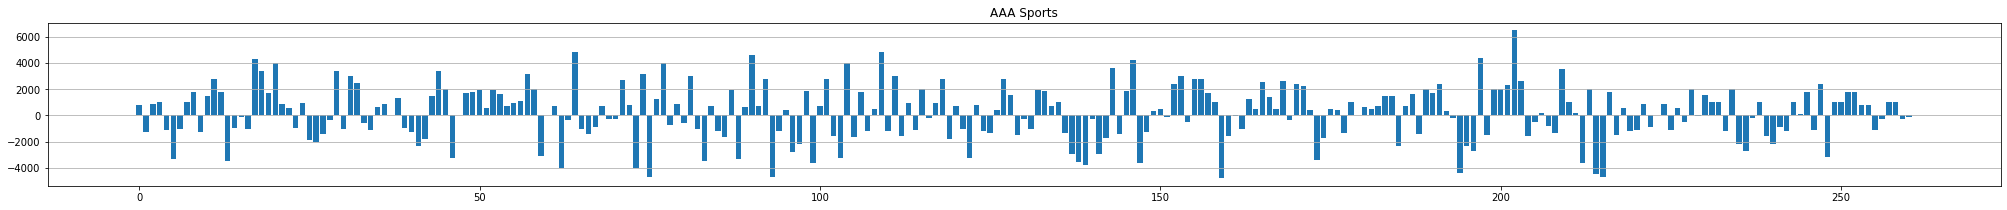

'AAA Sports'

DATE
20.11.12    1800
20.11.13     800
20.11.14     820
20.11.15   -1083
20.11.16    -290
20.11.17    1000
20.11.18    1000
20.11.19    -280
20.11.20    -112
Name: UNITS, dtype: int64

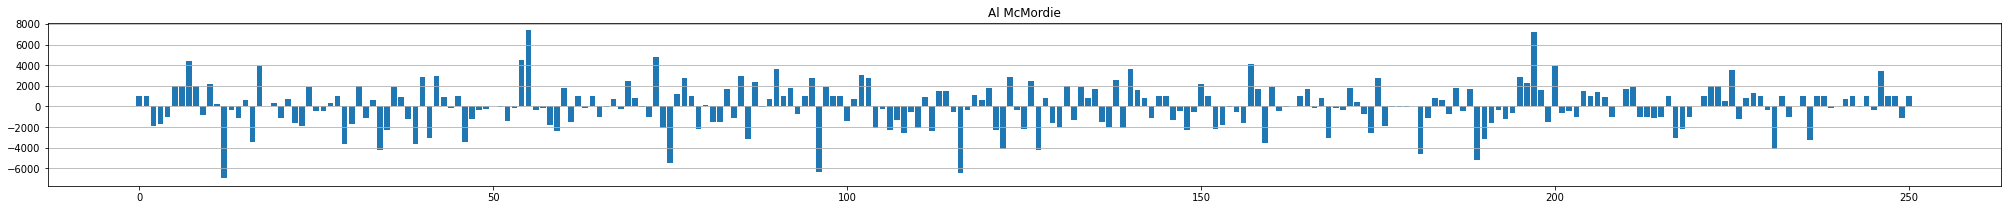

'Al McMordie'

DATE
20.11.09    1000
20.11.11     -26
20.11.13    1000
20.11.14    -350
20.11.15    3480
20.11.16    1000
20.11.17    1000
20.11.18   -1120
20.11.19    1000
Name: UNITS, dtype: int64

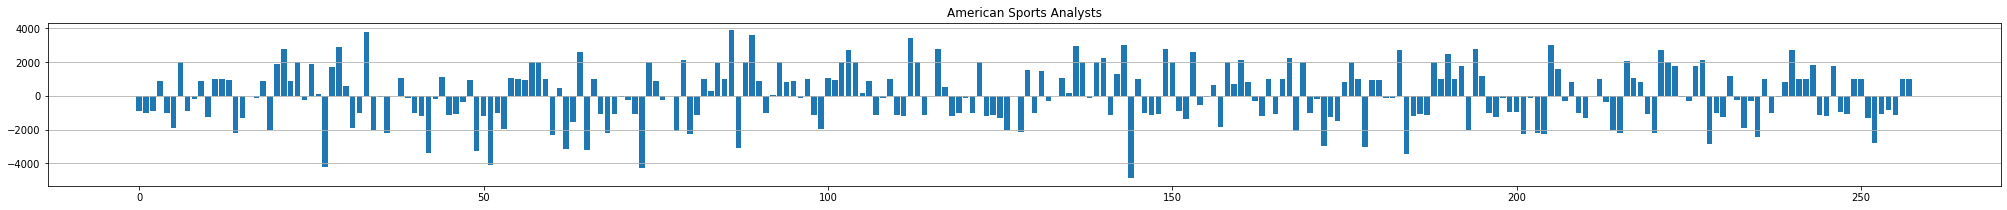

'American Sports Analysts'

DATE
20.11.12    1000
20.11.13    1000
20.11.14   -1294
20.11.15   -2764
20.11.16   -1070
20.11.17    -848
20.11.18   -1100
20.11.19    1000
20.11.20    1000
Name: UNITS, dtype: int64

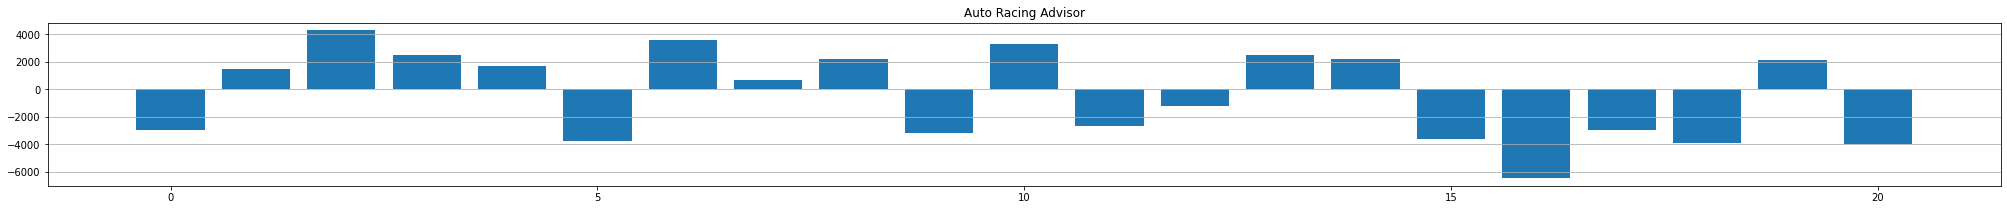

'Auto Racing Advisor'

DATE
20.06.14   -1253
20.06.22    2500
20.06.28    2200
20.07.11   -3600
20.07.12   -6500
20.07.18   -3000
20.08.02   -3913
20.08.23    2100
20.11.08   -4000
Name: UNITS, dtype: int64

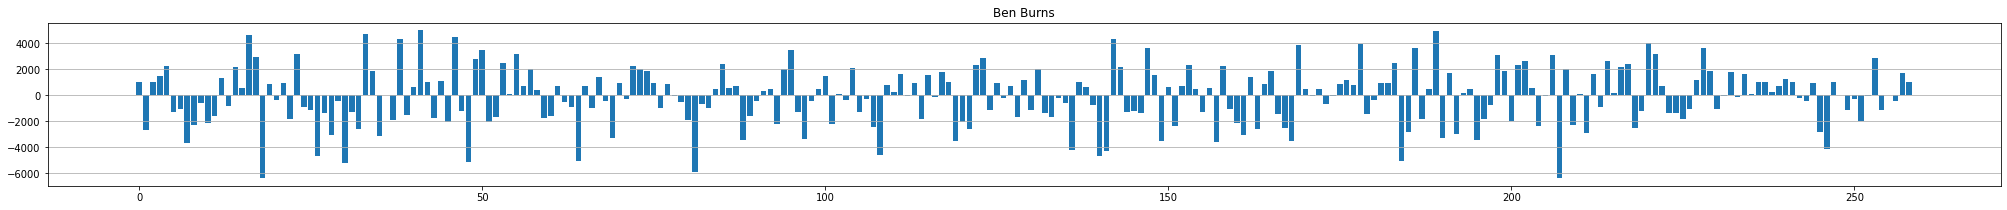

'Ben Burns'

DATE
20.11.12    -300
20.11.13   -2020
20.11.14     -35
20.11.15    2820
20.11.16   -1180
20.11.17       0
20.11.18    -420
20.11.19    1700
20.11.20    1000
Name: UNITS, dtype: int64

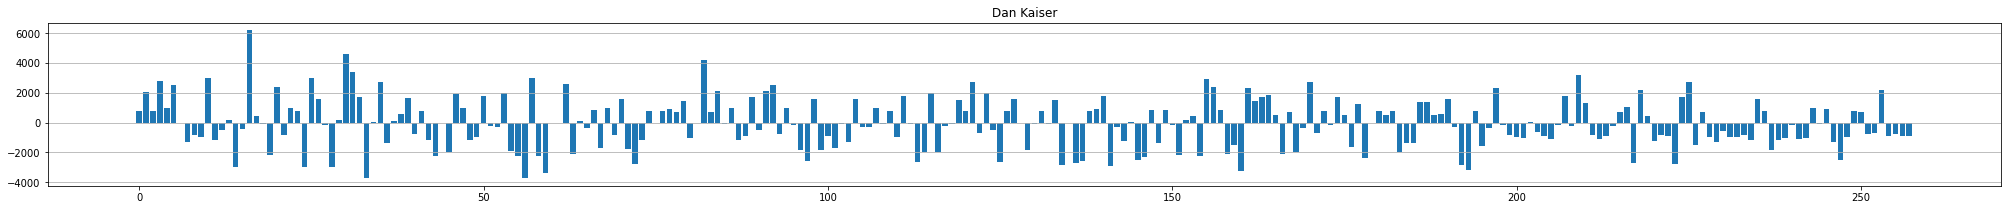

'Dan Kaiser'

DATE
20.11.10     800
20.11.11     700
20.11.12    -800
20.11.14    -733
20.11.15    2160
20.11.16    -880
20.11.18    -770
20.11.19    -920
20.11.20    -880
Name: UNITS, dtype: int64

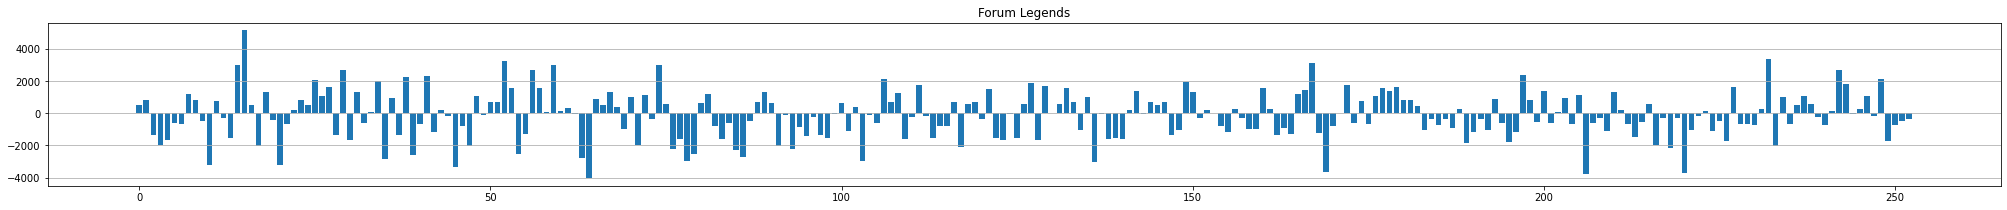

'Forum Legends'

DATE
20.11.10     -20
20.11.11     280
20.11.12    1090
20.11.13    -151
20.11.14    2114
20.11.15   -1716
20.11.16    -708
20.11.19    -476
20.11.20    -372
Name: UNITS, dtype: int64

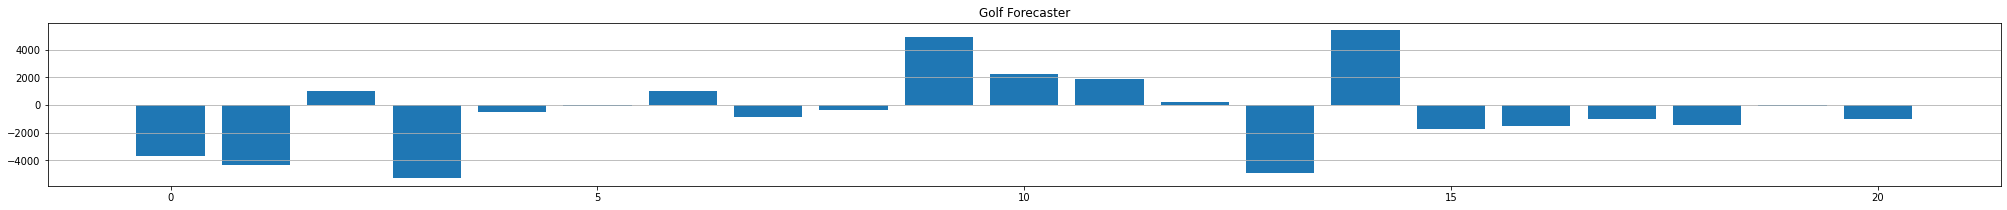

'Golf Forecaster'

DATE
20.06.14     200
20.06.21   -4900
20.06.28    5400
20.07.12   -1700
20.07.26   -1501
20.08.02   -1000
20.11.01   -1434
20.11.24    -100
20.12.07   -1000
Name: UNITS, dtype: int64

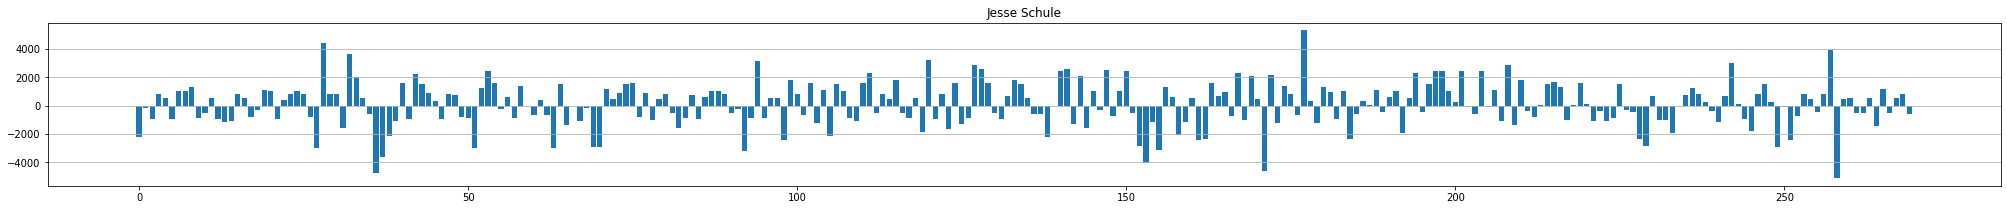

'Jesse Schule'

DATE
20.11.11    -540
20.11.12    -530
20.11.13     500
20.11.14   -1415
20.11.15    1160
20.11.16    -550
20.11.18     500
20.11.19     800
20.11.20    -570
Name: UNITS, dtype: int64

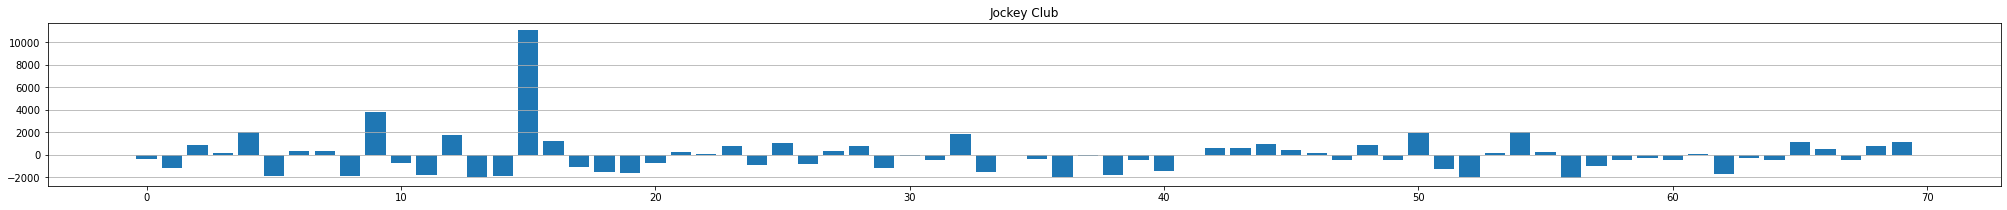

'Jockey Club'

DATE
20.09.04      60
20.09.10   -1700
20.09.18    -290
20.10.03    -500
20.10.10    1175
20.10.17     500
20.10.24    -500
20.10.30     780
20.11.07    1140
Name: UNITS, dtype: int64

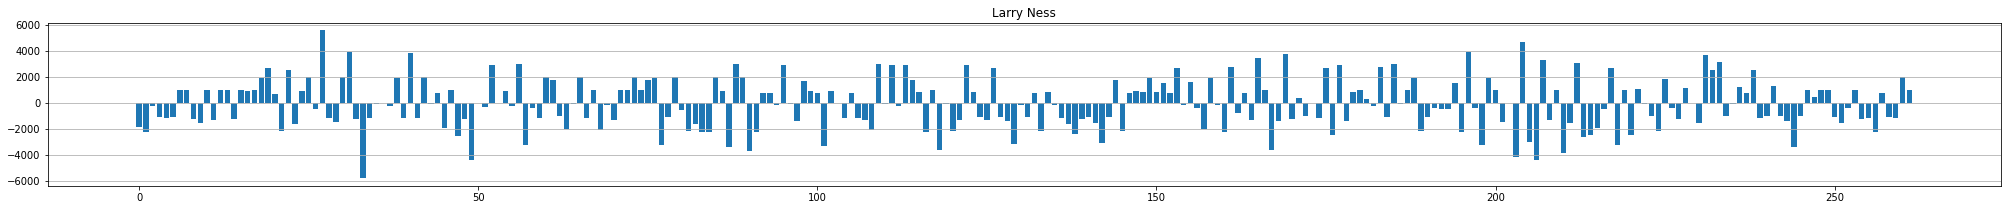

'Larry Ness'

DATE
20.11.11    1000
20.11.12   -1230
20.11.13   -1130
20.11.14   -2216
20.11.15     792
20.11.16   -1100
20.11.18   -1150
20.11.19    2000
20.11.20    1000
Name: UNITS, dtype: int64

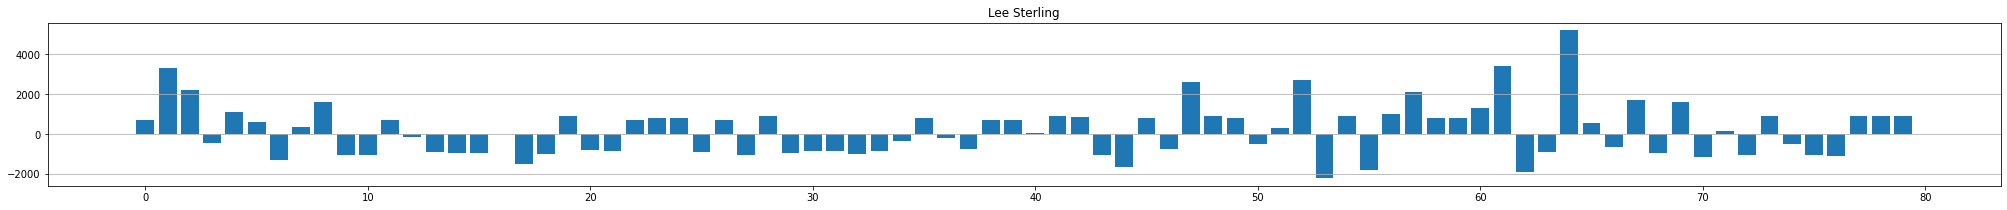

'Lee Sterling'

DATE
20.11.08     157
20.11.11   -1053
20.11.12     900
20.11.14    -520
20.11.15   -1046
20.11.16   -1080
20.11.18     900
20.11.19     900
20.11.20     900
Name: UNITS, dtype: int64

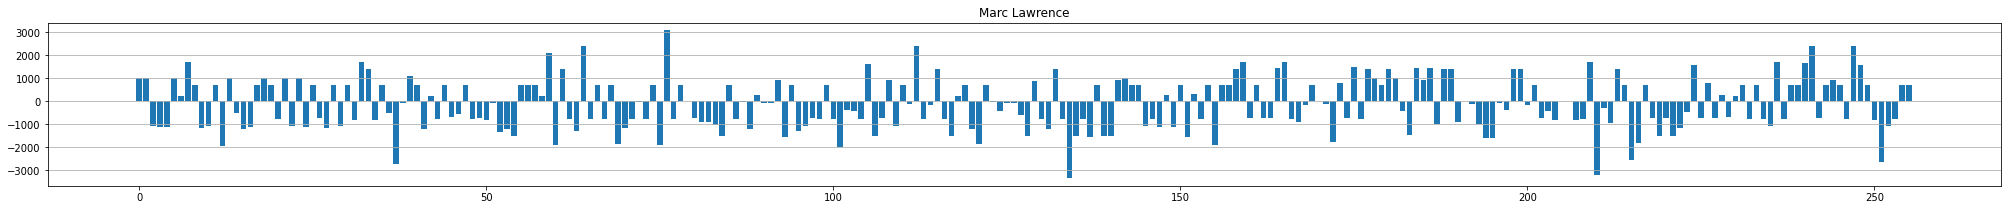

'Marc Lawrence'

DATE
20.11.07    2400
20.11.08    1574
20.11.12     700
20.11.13    -791
20.11.14   -2633
20.11.15   -1090
20.11.16    -770
20.11.19     700
20.11.20     700
Name: UNITS, dtype: int64

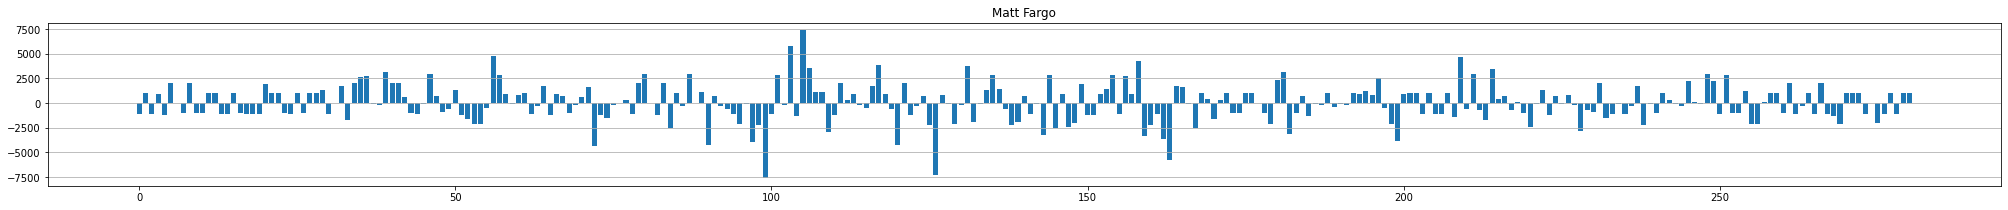

'Matt Fargo'

DATE
20.11.12    1000
20.11.13   -1120
20.11.14      10
20.11.15   -2013
20.11.16   -1100
20.11.17    1000
20.11.18   -1090
20.11.19    1000
20.11.20    1000
Name: UNITS, dtype: int64

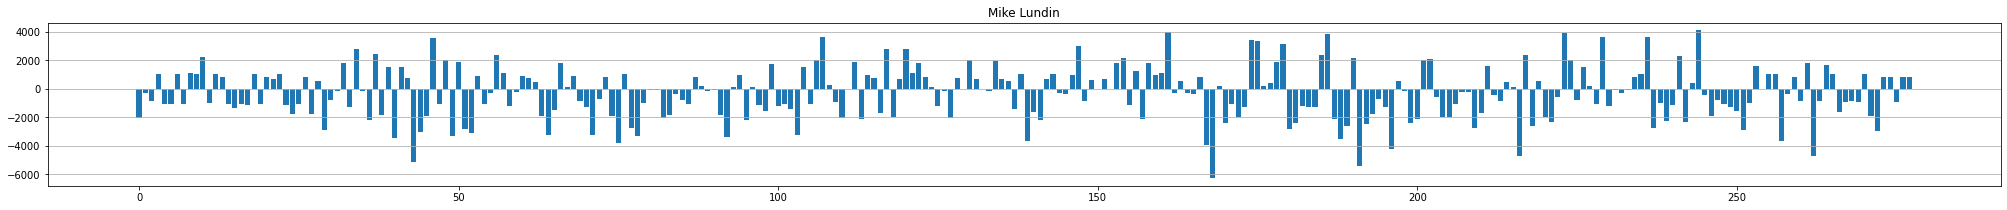

'Mike Lundin'

DATE
20.11.11    -928
20.11.12    1000
20.11.14   -1904
20.11.15   -2964
20.11.16     800
20.11.17     800
20.11.18    -924
20.11.19     800
20.11.20     800
Name: UNITS, dtype: int64

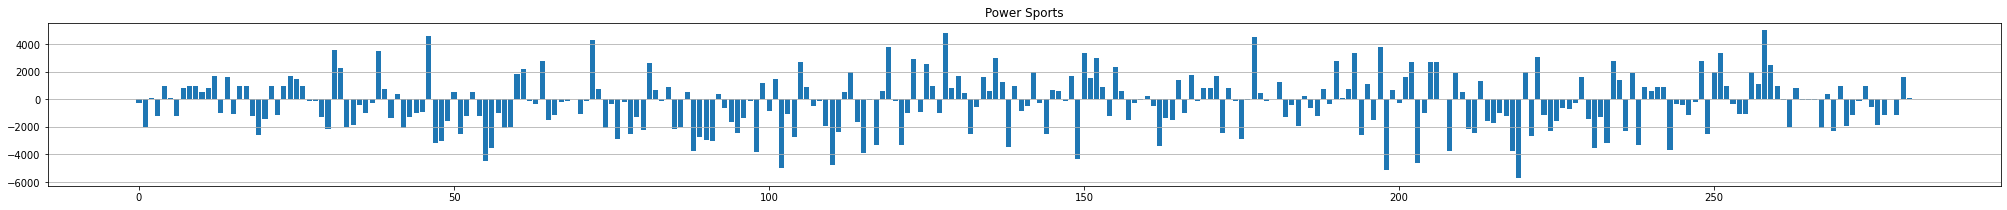

'Power Sports'

DATE
20.11.12     -90
20.11.13    1000
20.11.14    -562
20.11.15   -1831
20.11.16   -1100
20.11.17       0
20.11.18   -1120
20.11.19    1600
20.11.20      64
Name: UNITS, dtype: int64

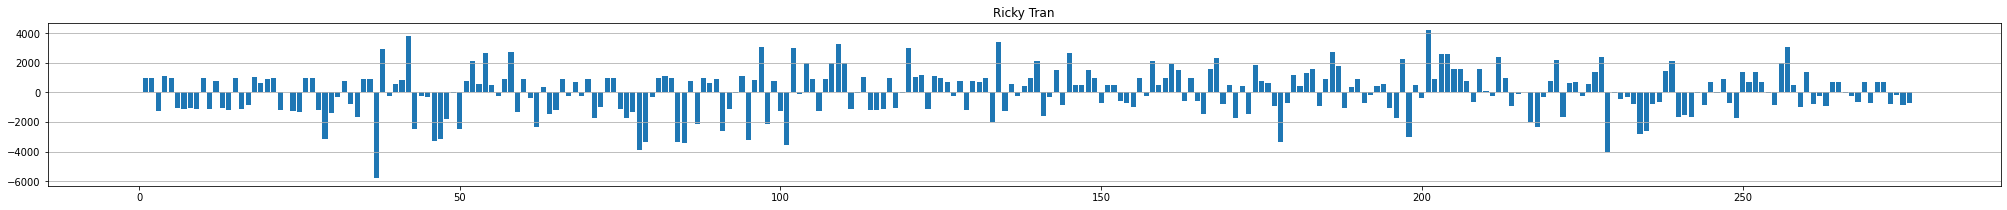

'Ricky Tran'

DATE
20.11.08   -658
20.11.09    700
20.11.10   -700
20.11.11    700
20.11.12    700
20.11.14   -770
20.11.15   -175
20.11.19   -847
20.11.20   -749
Name: UNITS, dtype: int64

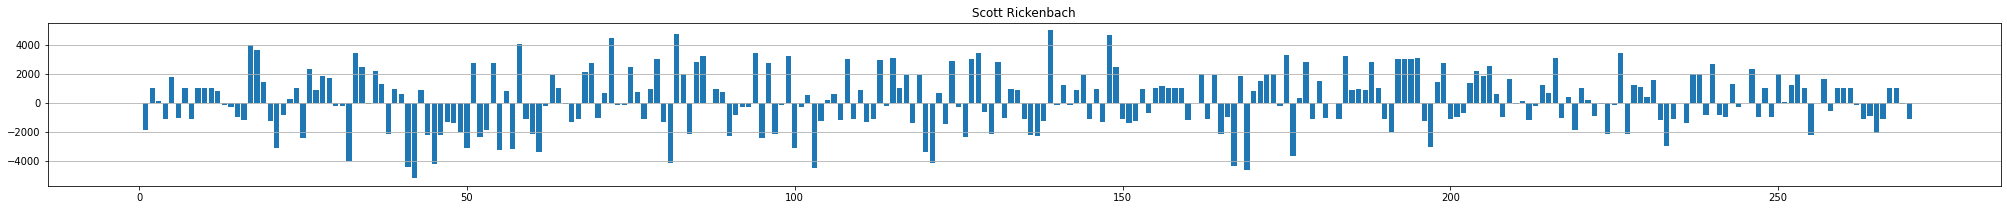

'Scott Rickenbach'

DATE
20.11.12    -140
20.11.13   -1100
20.11.14    -891
20.11.15   -2120
20.11.16   -1160
20.11.17    1000
20.11.18    1000
20.11.19     -70
20.11.20   -1160
Name: UNITS, dtype: int64

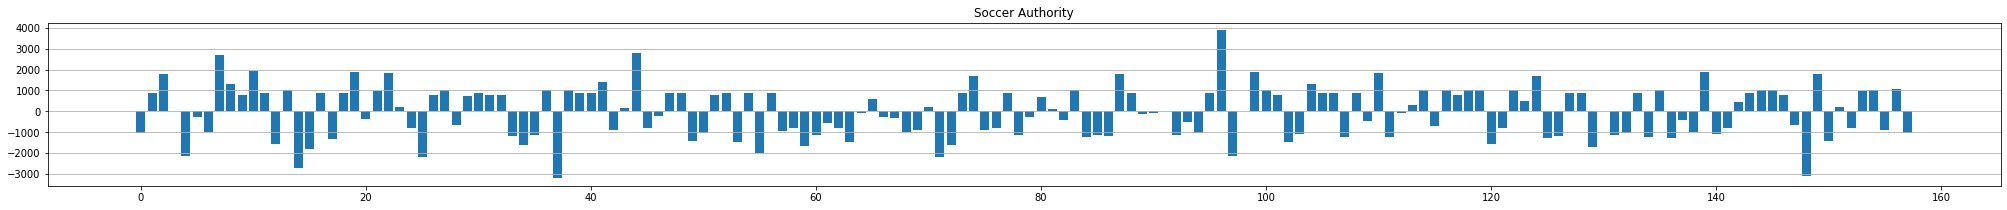

'Soccer Authority'

DATE
20.10.29    1800
20.11.03   -1410
20.11.04     190
20.11.06    -800
20.11.07     968
20.11.14    1000
20.11.15    -900
20.11.17    1060
20.11.20   -1035
Name: UNITS, dtype: int64

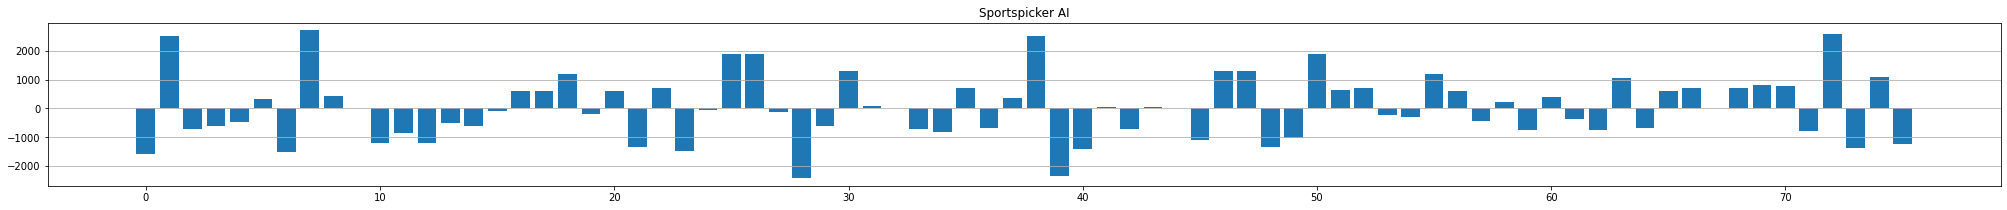

'Sportspicker AI'

DATE
20.10.02       0
20.10.04     700
20.10.05     816
20.10.11     780
20.10.18    -792
20.10.25    2600
20.11.01   -1387
20.11.08    1084
20.11.15   -1245
Name: UNITS, dtype: int64

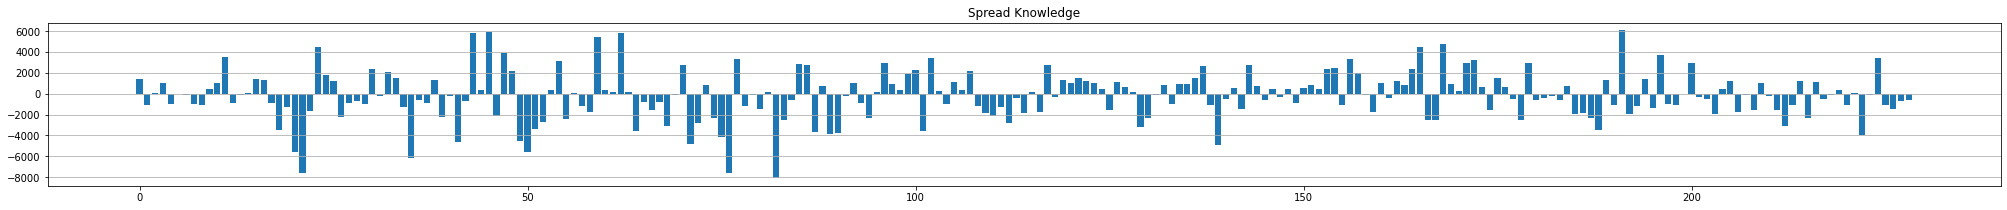

'Spread Knowledge'

DATE
20.11.02   -1100
20.11.07      52
20.11.08   -3956
20.11.14    -140
20.11.15    3380
20.11.16   -1050
20.11.18   -1491
20.11.19    -735
20.11.20    -625
Name: UNITS, dtype: int64

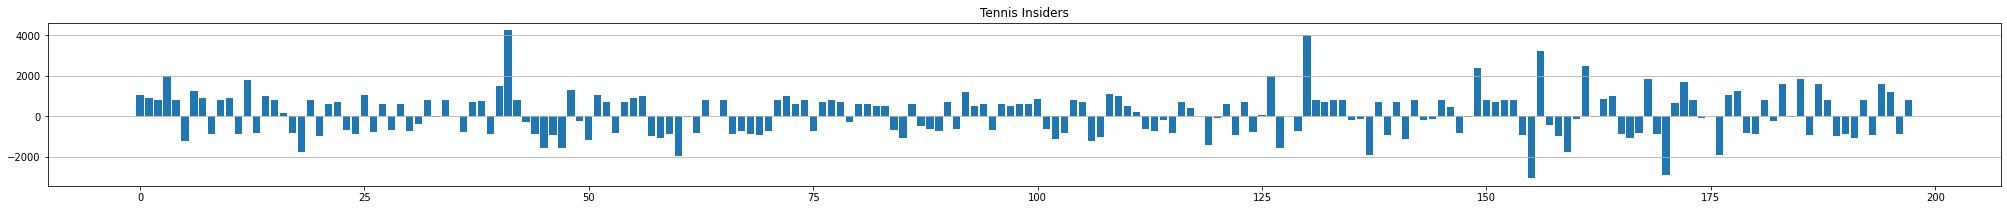

'Tennis Insiders'

DATE
20.11.06    -952
20.11.08    -888
20.11.10   -1080
20.11.11     800
20.11.14    -900
20.11.16    1600
20.11.17    1200
20.11.18    -848
20.11.19     800
Name: UNITS, dtype: int64

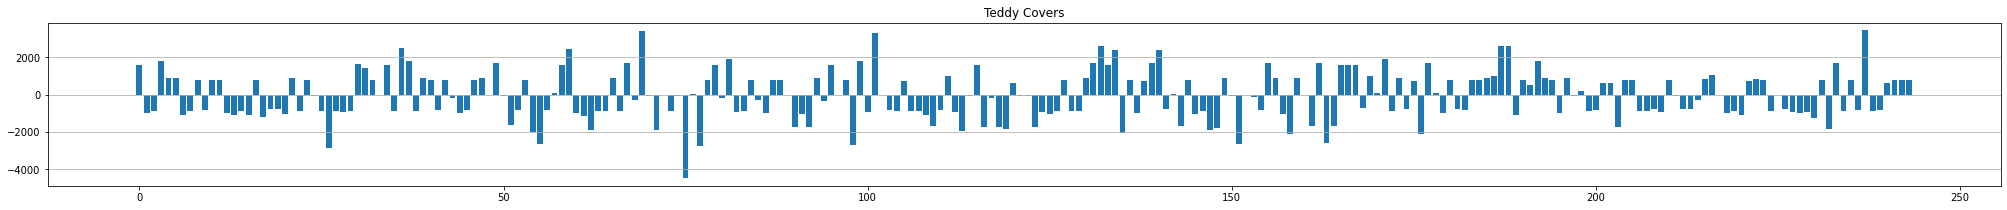

'Teddy Covers'

DATE
20.11.06     800
20.11.07    -828
20.11.08    3456
20.11.11    -880
20.11.13    -840
20.11.14     628
20.11.15     800
20.11.16     800
20.11.20     800
Name: UNITS, dtype: int64

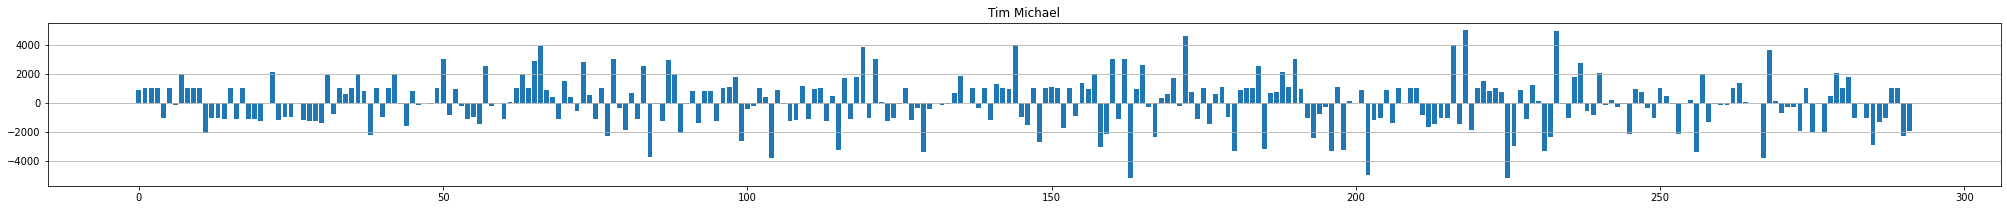

'Tim Michael'

DATE
20.11.12    -100
20.11.13   -1070
20.11.14   -2908
20.11.15   -1358
20.11.16   -1090
20.11.17    1000
20.11.18    1000
20.11.19   -2330
20.11.20   -1994
Name: UNITS, dtype: int64

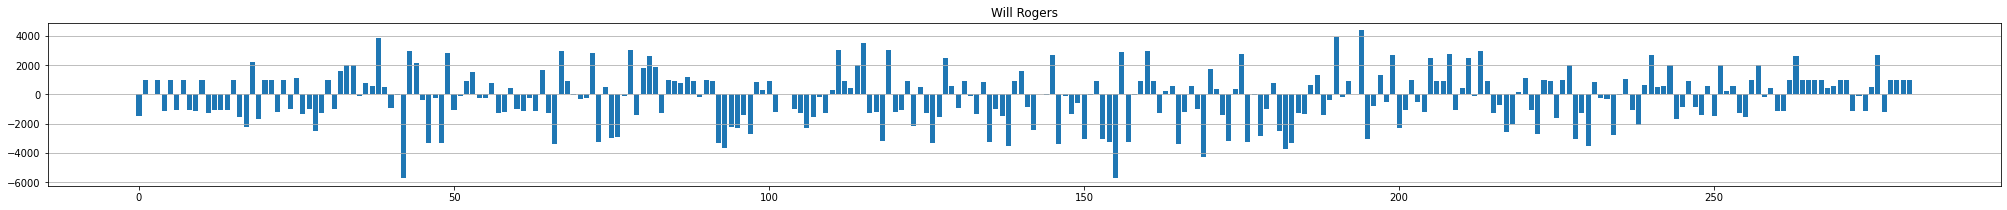

'Will Rogers'

DATE
20.11.12    -100
20.11.13   -1170
20.11.14     500
20.11.15    2700
20.11.16   -1180
20.11.17    1000
20.11.18    1000
20.11.19    1000
20.11.20    1000
Name: UNITS, dtype: int64

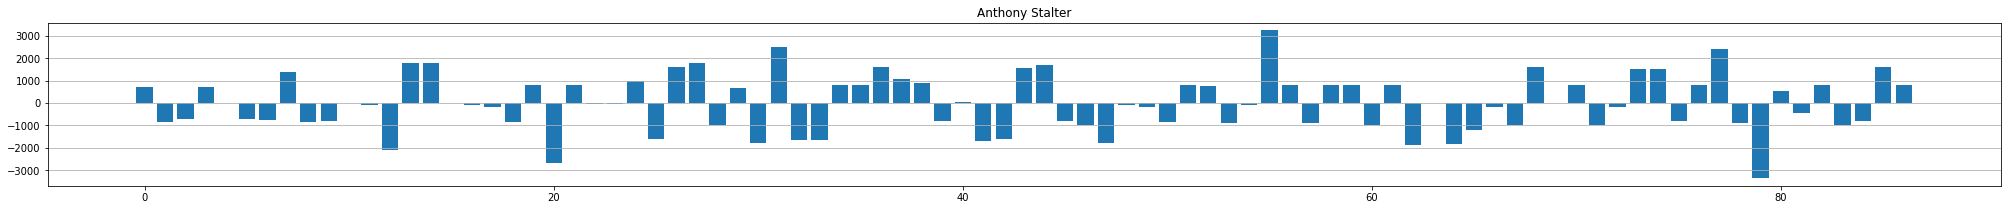

'Anthony Stalter'

DATE
20.11.05    -880
20.11.07   -3352
20.11.08     520
20.11.10    -444
20.11.12     800
20.11.14    -960
20.11.15    -800
20.11.18    1600
20.11.19     800
Name: UNITS, dtype: int64

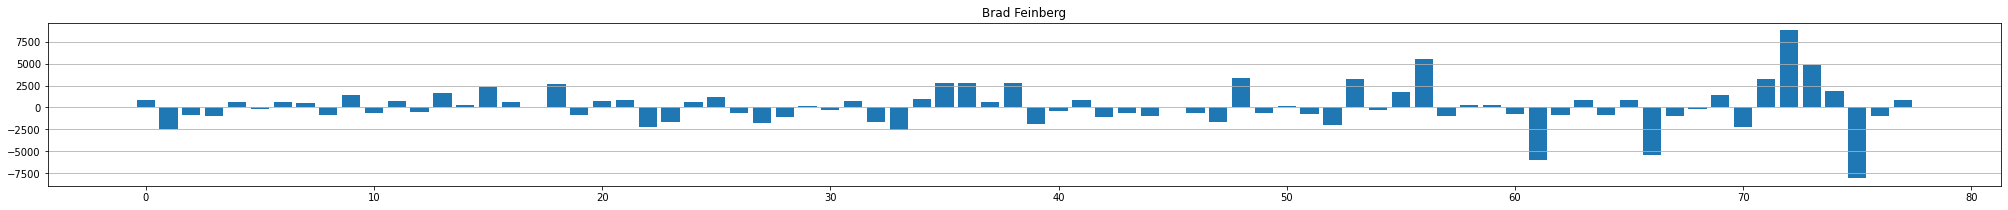

'Brad Feinberg'

DATE
20.10.18    1413
20.10.24   -2180
20.10.25    3265
20.11.01    8800
20.11.08    4852
20.11.09    1900
20.11.15   -8068
20.11.16    -990
20.11.19     900
Name: UNITS, dtype: int64

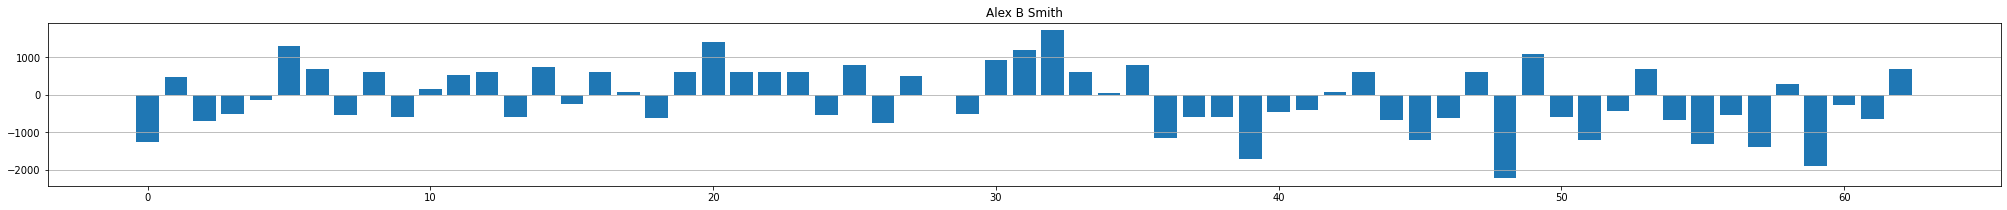

'Alex B Smith'

DATE
20.10.30    -660
20.11.01   -1314
20.11.04    -550
20.11.07   -1386
20.11.08     300
20.11.14   -1895
20.11.15    -270
20.11.19    -636
20.11.20     700
Name: UNITS, dtype: int64

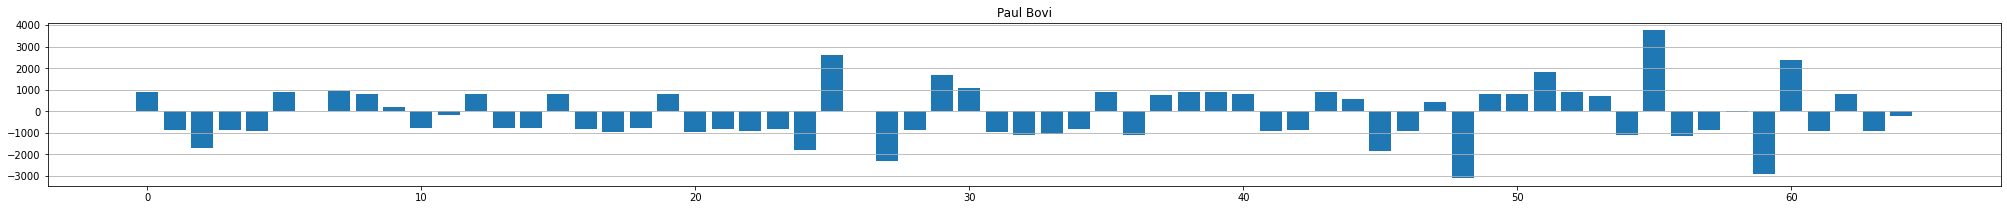

'Paul Bovi'

DATE
20.11.09   -1144
20.11.10    -854
20.11.11     -45
20.11.14   -2941
20.11.15    2359
20.11.16    -912
20.11.18     800
20.11.19    -918
20.11.20    -230
Name: UNITS, dtype: int64

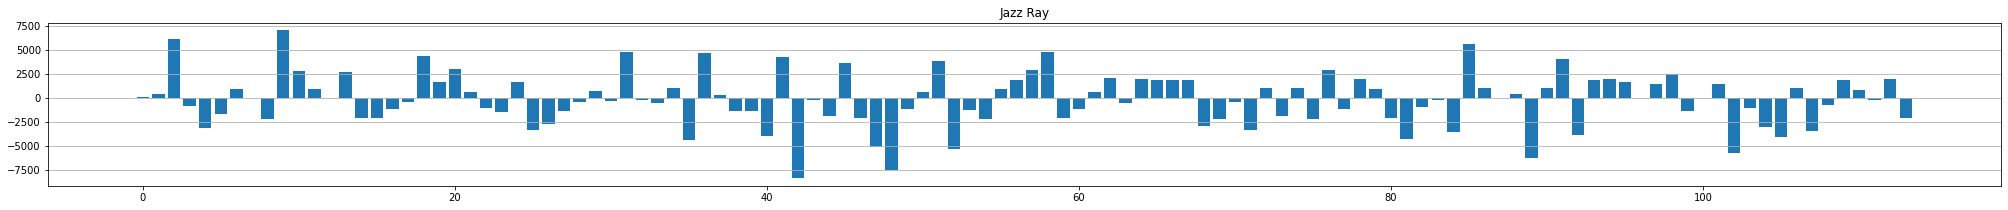

'Jazz Ray'

DATE
20.11.11   -4126
20.11.13    1000
20.11.14   -3448
20.11.15    -811
20.11.16    1900
20.11.17     783
20.11.18    -260
20.11.19    2000
20.11.20   -2090
Name: UNITS, dtype: int64

In [ ]:
wager=pd.DataFrame(columns=['Date','Wager'])
wag={}
all=pd.DataFrame(columns=cols,index=cappers.keys()).fillna(0)
sum=0
for capper in cappers.keys():
  filename=capper+'.csv'
  cap=pd.read_csv(path+filename)
  curr_cap=cap.groupby(by=['DATE'])['UNITS'].sum()
  grafik=pd.DataFrame(curr_cap).reset_index()

  plt.figure(figsize=(42,3))
  plt.grid(axis='y')
  plt.bar(grafik.index,grafik['UNITS'])
  plt.title(capper)
  plt.show()

  display(capper,curr_cap.tail(9))
#Steve Merril -8, Spread Knowledge +5, Teddy Covers +, 

In [ ]:
#на один раз
www='https://experts.covers.com'
cappers=soup.find_all(class_='cmg_l_col cmg_l_span_9')
links={}
for l in cappers:
  cap_link=l.find(class_='capper_name').get('href')
  cap_name=l.find(class_='capper_name').get_text()
  links[cap_name]=www+cap_link

In [ ]:
rr = requests.get('https://experts.covers.com/Handicapper/Ben_Burns', headers=headers)
ss = BeautifulSoup(rr.text, 'html.parser')
det=ss.find('table').find_all('a')
details=list(det)
for el in details:
  if el.get_text().split(' ')[0] in ['Under','Over','Both']:
    link=el.get('href')
    pick = requests.get(www+link, headers=headers)
    pick_soup=BeautifulSoup(pick.text,'html.parser')
    pick_unit=pick_soup.find(class_='covers-CoversExpertsDetails-h4').get_text()
    if pick_unit[0]=='(':
        pick_unit=' '.join(pick_unit.split(' ')[1:-1])
    print(f"{el.get_text()}. {pick_unit}")

Under  (1st H). San Francisco  vs.  Kansas City
Under . San Francisco  vs.  Kansas City


In [ ]:
#удаление дубликатов
for capper in cappers.keys():
  filename=capper+'.csv'
  cap=pd.read_csv(path+filename)
  cap.drop_duplicates(inplace=True)
  display(cap)
  cap.to_csv(path+filename,encoding="cp1251",index=False)

In [ ]:
#Всех капперов в новые файлы
def date_corr(row):
    d=dt.strptime(row['DATE']+' 20','%b %d %y')
    row['DATE']=d.strftime('%y.%m.%d')
    return row
cappers={'Esports Edge': 'https://experts.covers.com/handicapper/esports_edge',
         'Jockey Club': 'https://experts.covers.com/handicapper/jockey_club'}
try:
  for capper,link in cappers.items():
    cap=pd.read_html(link)
    sports=pd.DataFrame(columns=['Capper','DATE','W/L','League','PICK','UNITS'])
    for i in range(1,len(cap)):
      cap[i].insert(0,'Capper',capper)
      cap[i]=cap[i].apply(date_corr,axis=1)
      sports=sports.append(cap[i])
    sports=sports.sort_values(by='DATE')
    sports.to_csv(path+capper+'.csv',encoding="cp1251",index=False)
    display(capper)
    time.sleep(11)
except ValueError:
  pass
display('ГОТОВО')

'Esports Edge'

'Jockey Club'

'ГОТОВО'

In [ ]:
#OLD VERSION
#Обновление
def date_corr(row):
    d=dt.strptime(row['DATE']+' 20','%b %d %y')
    row['DATE']=d.strftime('%y.%m.%d')
    pik=row['PICK'].split(' ')[0].strip()
    if pik in ['Under','Over','Both']:
      el=details[i]
      link1=el.get('href')
      pick = requests.get(www+link1, headers=headers)
      pick_soup=BeautifulSoup(pick.text,'html.parser')
      pick_unit=pick_soup.find(class_='covers-CoversExpertsDetails-h4').get_text()
      if pick_unit[0]=='(':
        pick_unit=' '.join(pick_unit.split(' ')[1:-1])
      row['PICK']=f"{pik}. {pick_unit}"
    return row
#cappers={'Lee Sterling':'https://experts.covers.com/handicapper/lee_sterling'}
try:
  dd=dt.now()
  dd-=td(days=1)
  dat=dd.strftime('%y.%m.%d')
  #dat='20.08.01'
  print(dat)
  for capper,link.lower() in list(cappers.items()):
    cap=pd.read_html(link)
    rr = requests.get(link, headers=headers)
    ss = BeautifulSoup(rr.text, 'html.parser')
    det=ss.find('table').find_all('a')
    details=list(det)
    sports=pd.DataFrame(columns=['Capper','DATE','W/L','League','PICK','UNITS'])
    for i in range(1,len(cap)):
      if len(cap[i])>1:
        cap[i].insert(0,'Capper',capper)
        cap[i]=cap[i].apply(date_corr,axis=1)
        sports=sports.append(cap[i])
    sports_new=sports.query("DATE=='{}'".format(dat))
    if len(sports_new)>0:
      display(capper)
      #sports_new.to_csv(path+capper+'.csv',mode='a',encoding="cp1251",index=False,header=False)
    time.sleep(11)
except ValueError:
  print('Error',i,capper)
display('ГОТОВО')